<a href="https://colab.research.google.com/github/mystic23/Alg_Havel_Hakimi/blob/main/Algm_Havel_Hakimi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Havel-Hakimi - Grafos
### (1) Teorema
### (2) Algoritmo


#Teorema

  Una secuencia S: d<sub>1</sub>,d<sub>2</sub>, ... , d<sub>n</sub> de números enteros no negativos, con d<sub>1</sub> ≥ d<sub>2</sub> ≥ ... ≥ d<sub>n</sub>, es una secuencia gráfica si, y sólo si, la secuencia  d<sub>2</sub>-1, d<sub>3</sub>-1 , ... , d<sub>*d1+1*</sub> -1,d<sub>*d1+2*</sub> , ..., d<sub>*n*</sub>

  [Teorema enlace - Trello](https://trello.com/c/zUDu1mH8/47-teorema-havel-hakimi)


- Ejemplo:
  S: 6, 5, 4, 3, 3, 3, 2, 0
  1. Eliminar el primer elemento **6** reducirá los 6 elementos después del primer elemento en -1 y se obtiene, además, se reorganiza de Mayor a menor si esta desorganizado: 
    
    **S: 4, 3, 2, 2, 2, 1, 0**
  
  2. Eliminar **4**, se reduce en 4 elementos después del primero en -1, se obtiene:

    **S: 2, 1, 1, 1, 1, 0**
  
  3. Eliminar **2**, se reduce en 2 elementos después del primero en -1, se obtiene:

    **S: 0, 0, 1, 1, 0**

    Organizado:

    **S: 1, 1, 0, 0, 0**

  4. Eliminar **1**, se reduce en  1 elementos después del primero en -1, se obtiene:

    **S: 0, 0, 0, 0**

  
  

# Algoritmo

La longitud de la secuencia de grados es 8
Secuencia intermedia: [6, 5, 4, 3, 3, 3, 2, 0]
Extraído: 6
Secuencia intermedia: [4, 3, 2, 2, 2, 1, 0]
Extraído: 4
Secuencia intermedia: [2, 1, 1, 1, 1, 0]
Extraído: 2
Secuencia intermedia: [1, 1, 0, 0, 0]
Extraído: 1
Secuencia intermedia: [0, 0, 0, 0]
Existe un grafo G con esta secuencia de grados.
Secuencia intermedia: [6, 5, 4, 3, 3, 3, 2, 0]
Extraído: 6
Secuencia intermedia: [4, 3, 2, 2, 2, 1, 0]
Extraído: 4
Secuencia intermedia: [2, 1, 1, 1, 1, 0]
Extraído: 2
Secuencia intermedia: [1, 1, 0, 0, 0]
Extraído: 1
Secuencia intermedia: [0, 0, 0, 0]
Existe un grafo G con esta secuencia de grados.


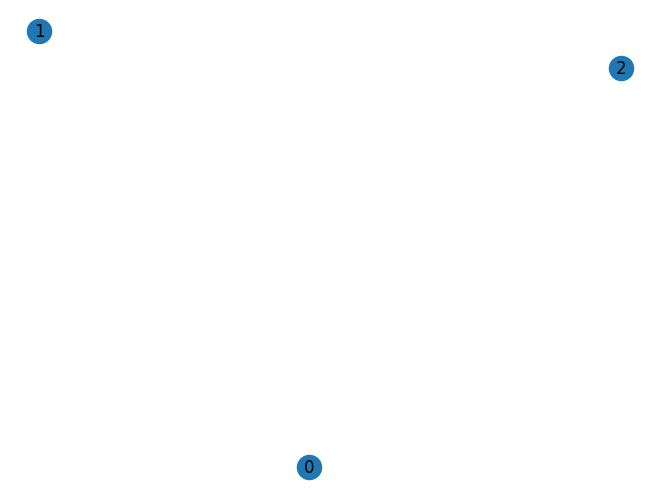

In [12]:
import matplotlib.pyplot as plt
import networkx as nx

def havelHakimi(sequence):

    # Comprobar que todos los elementos de la secuencia son enteros
    if all(isinstance(degrees, int) for degrees in sequence):
       degree_sequence = list(sequence)
    else:
        return False

    # Comprobar si la secuencia está vacía
    if len(degree_sequence) == 0:
        print("La lista está vacía.")
        return True

    # Comprobar si la suma de los grados es impar
    if sum(degree_sequence) % 2:
        print("No existe un grafo con esta secuencia de grados. Además, la suma de todos los elementos de la secuencia de grados no es par.")
        return False

    # Comprobar si hay algún grado negativo
    if min(degree_sequence) < 0:
        print("No existe ningún grafo con esa secuencia de grados. ¡La secuencia de grados no debe tener números negativos!")
        return False

    # Aplicar el algoritmo de Havel-Hakimi para construir la secuencia de grados resultante
    while degree_sequence:
      degree_sequence.sort()  # Ordenar la secuencia de grados de manera ascendente
      degree_sequence.reverse()  # Invertir la secuencia de grados para obtener el orden descendente
      print("Secuencia intermedia: " + str(degree_sequence))
      for item in degree_sequence:
          if item < 0:
              print("No existe ningún grafo con esta secuencia de grados.")
              return (False, degree_sequence)
      d = degree_sequence.pop(0)  # Extraer el primer grado de la secuencia (el más grande)
      if d == 0:
          print("Existe un grafo G con esta secuencia de grados.")
          return (True, degree_sequence)
      if d > len(degree_sequence):
          print(str(d) + " grado es demasiado grande para la secuencia.")
          return (False, degree_sequence)
      for i in range(0, d):
          degree_sequence[i] -= 1  # Restar 1 a los grados de los primeros d vértices de la secuencia
      print("Extraído: " + str(d))
    return (False, degree_sequence)

# Definir la secuencia de grados
sequence=[6, 5, 4, 3, 3, 3, 2, 0]
n=8
print("La longitud de la secuencia de grados es {0}".format(n))

# Ejecutar el algoritmo de Havel-Hakimi y generar el grafo resultante si es posible
x = havelHakimi(sequence)[0]

grados_resultante = havelHakimi(sequence)[1]
if x==True:
    G = nx.configuration_model(grados_resultante)
    nx.draw(G, with_labels=True)
    plt.show()
